<h1 align="center">Prediction Of Boston Housing Prices</h1>

## Introduction 
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

We start with loading the Boston housing dataset, along with a few of the necessary Python libraries required for this project. We separate the the features and prices into different panda dataframes.

In [6]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

#importing some plotting themes for better looking graphs
from jupyterthemes import jtplot
#setting the plot styles
jtplot.style(context='poster', theme='onedork')

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

## Calculating Statistics
We are calculating some descriptive statistics about the Boston Housing Prices.

In [86]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


## Feature Observation
Now we again have a close look at the data, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

Before bulding the model, we try to see the how each feature affects the `MEDV` i.e. the prices of houses. We can do this by our logic and intuition.

- `‘RM’`: An increase in the value of this feature will lead to an increase in the value of ‘MEDV’. This is because for you’d expect a home with a higher number of rooms to be more expensive that a home with lower number of rooms.
- `'LSTAT'`: An increase in the value of this feature will lead to a decrease in the value of ‘MEDV’. A lower class homeowner might not be able to afford expensive houses, so one would expect them move-in to a cheaper home. A higher percentage of such people could correlate to cheaper homes in an area, and thus, a lower ‘MEDV’ value.
- `'PTRATIO'`: An increase in this feature value results to decrease in the 'MEDV' value. This is because schools with lower student to teacher ratio cost more to people and hence these schools are always near posh areas.

We may build plots to check if our intuition for these features are correct:

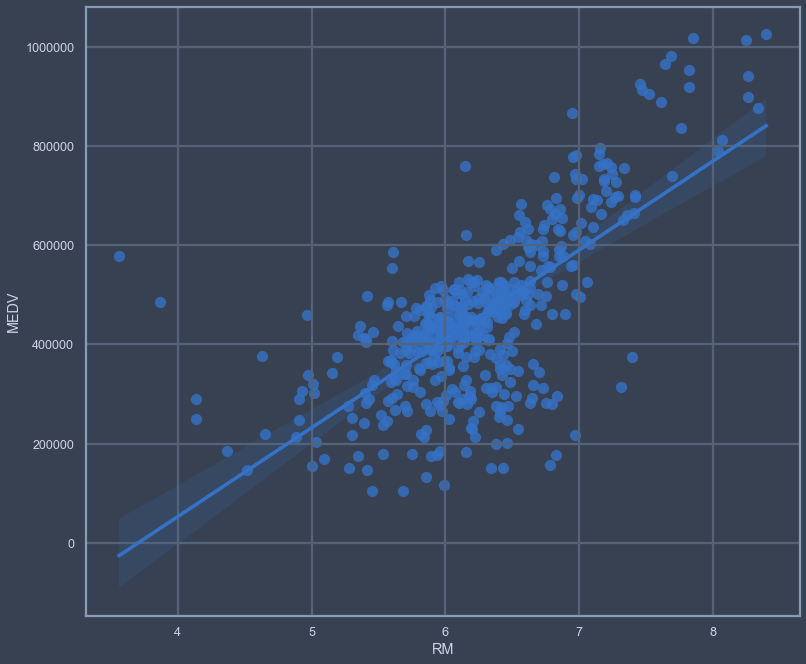

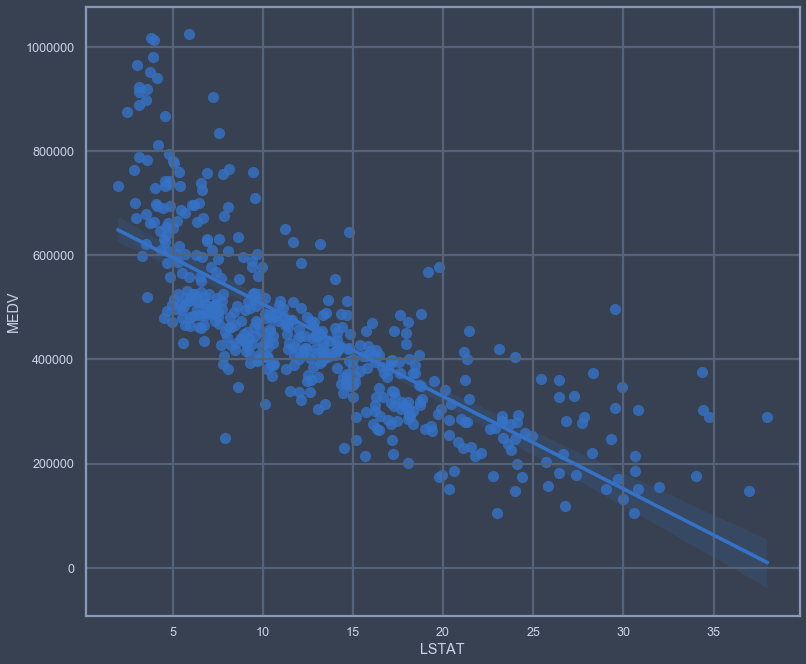

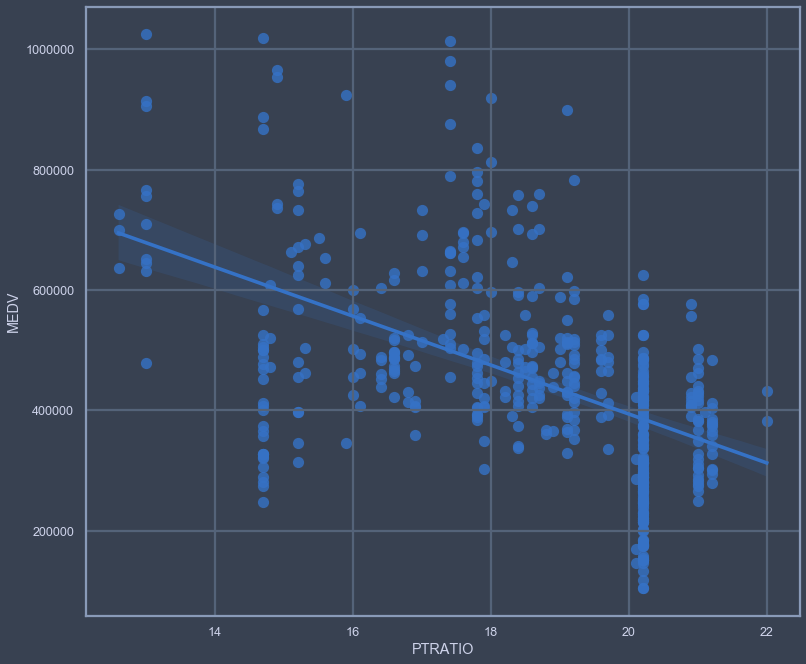

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in features.columns:
    sns.regplot(data[var],prices)
    plt.show()


----

## Developing a Model
In this section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

Here we define a function to calculate the performance metrics.

In [10]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [11]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


Considering that the R2 score lies bteween the range of 0 to 1, and the above model has a score of 0.923 , we can say that it captures more than 90% variation of the the target variable.

### Shuffle and Split Data
Our next implementation requires that we take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.


In [12]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Training and Testing

By splitting a dataset into training and testing subsets, we can train our model on the training subset, and then feed it with unseen data from the test subset to evaluate the performance of our model.

Training and testing on the same data doesn’t give us a genuine evaluation of the model, at it has already seen testing the data when training, and thus might not perform well in real-world scenarios where we often deal with unseen data. Related to this is the problem of “overfitting”, i.e. the model can be really accurate on the training data, but perform poorly on the training data.

----

## Analyzing Model Performance
In this third section of the project, we'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, we'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing our model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

- Note: The section uses helper functions supplied for the purposes of this project and available in the ‘visuals’ module.

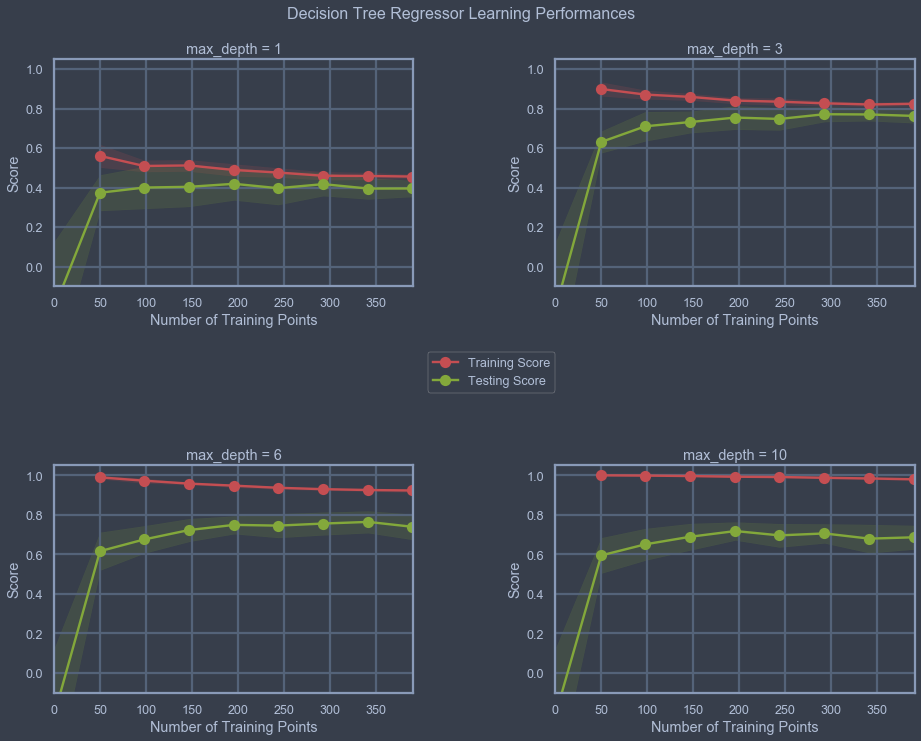

In [17]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

Analyzing the learning curve for the model with max_depth = 3,
- The score of the training curve decreases as more training points are added. This happens because with fewer training points, the model can modify its paramters to better approximate the targets; but as the number of training points increases, perfectly fitting them becomes more difficult, and the training score goes down.
- The score of the training curve increases as more training points are added, but there’s a slight dip after adding more than 350 training points. The score starts lower because the model has not yet learned enough to predict test points. As the model receives more training points, and hence, more information, it is better suited to predict unseen data.
- The training and testing curve seem to be converging to the same score. This usually happens when the model has stretched its limits of extracting information from the training data even though more training points are being added. So the score stabilizes.

Clearly from these graphs we can see that more number of training points are not going to help achieve any better results.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

In [32]:
import matplotlib.pyplot as pl
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, train_test_split
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(9, 7))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()

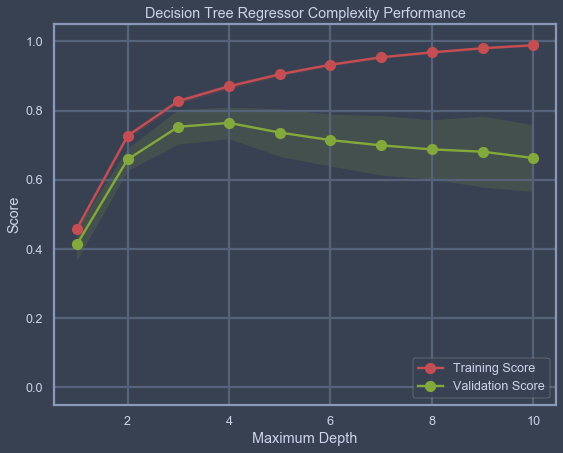

In [33]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff

- Model trained with max_depth 1: The model suffer from high bias. This is evident from the graph as we can see both training set and cross validation set have a low score(meaning high error) with similar values. This means the model oversimplifies the prediction and fail to capture the many underlying relationships with the data.
- Model trained with min_depth 10: The model clearly suffers from high variance. The validation score is quite low and a the training score is almost perfect. This implies that the model is too complex and fails to generalise on the unseen data. Hence it gives huge error on the validation set.

### Best-Guess Optimal Model

I think one can figure out from the graph thay validation score increases to maximum value at `max_depth=3` and then starts decreasing. On the other hand the tarining score keeps increasing(as expected since with more complexity overfitting occurs) with increasing model complexity. Now one should choose a model that generalises well over all the data without oversimplifying the model(i.e. we aim to get a model with optimal scores and least difference in the training and validation scores). With a score of both training and validation around 0.8, we would say depth of 3 is the perfect model to use.

-----

## Evaluating Model Performance
In this final section of the project, we will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

Techniques like **Grid Search** and **Cross-Validation** come in handy for us in this section.

### Grid Search

- Gird Search is a technique to obtain the optimal model performance; it tries every combination of parameters and cross validates the result of each combination based on a scoring technique(for e.g. f1_score), and uses this scorer to obtain the best performance.
- It can be easily applied to optimize learning algorithm. For any model, we can specify the parameters with different possible values for each of them. Grid Search then returns the best parameters for our model after fitting the data. This is computationally expensive but gives the best results and saves us from making any guess-work.

### Cross-Validation

- The k-fold cross-validation is a technique in which we split the data into k groups. The data is iterated upon k times, each time one model is used for validation and the other k-1 for training the model. This way each group is once used for validation. The result for the k iterations are then averaged out.
- It is benefecial to use this technique with grid search to optimize a model as it allows one to look for parameter configurattion that performs well for different data sets. If we had a single testing set, it’s easy to tune a model to perform well for that specific test set (and result in overfitting on the test set in this case), while cross validation allows us to generalize the results.

You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for better understanding.

### Fitting a Model
Our final implementation requires that we bring everything together and train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, this implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique we described previously, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*.


In [36]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Optimal Model

We fit the decision tree regressor to the training data and produce an optimal model.

In [37]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


We obtain max depth of 4 as the optimal model. This is very close what we had predicted i.e. max_depth=3, from the model complexity graph. The model with max_depth 4 might perform a little better(which may be due to some noise) on the test set but the difference is almost minimal and it might make sense to choose a simpler model.

### Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

Now based on the above features, let's see if our model predicts a reasonable price for each client.


In [40]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


The predictions for the price seem quite reasonable. The prices are as per the intuition that a general public would agree with and what we had described earlier in the project. Basically more number of rooms accounted for a higher price, a higher student to teacher ratio and higher percentage of neigbourhood poverty level both account for a lower price for the clients. Hence the model seems to work fine.

This brings out project to an end. We built a decision tree regressor that performs reasonably well with the given features. But can we use this model in a real-world setting? Let's taking a deeper glance into this.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**We run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [41]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Applicability
Even though we obtained an optimal model which makes reasonable predicitons. We should discuss its applicability in a real world setting. Here are a few insights.

- The data was collected in 1978. This means that the features that matter might vary due to several factors like increase in populations density. So this data isn't relevant to predict prices today.
- The features present in the data that we built our model on may not be sufficient to describe a home. Interesting features to look at may be the proximity to city center, or neighbourhood crime rate.
- The data may not indicate the same trend for urban and rural areas. This is because both have different dependencies. For e.g. number of rooms doesn't matter so much in a rural setting as in an urban one.

<h3 align="center"> End</h3>